<a href="https://colab.research.google.com/github/gjrkdgh0772/Python-Review/blob/master/lec19_clustering_%EA%B0%95%ED%98%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


opencv.korea@gmail.com


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

from sklearn.datasets import load_iris

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import Ridge, RidgeCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVC

from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error

from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data = load_iris()
data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
df = pd.DataFrame(data=data['data'], columns = data['feature_names'])
df['target'] = data['target']

In [ ]:
df.columns = ['sl', 'sw', 'pl', 'pw','target']
df.head()

,sl,sw,pl,pw,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sl      150 non-null    float64
 1   sw      150 non-null    float64
 2   pl      150 non-null    float64
 3   pw      150 non-null    float64
 4   target  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
(150, 5)


In [ ]:
df

,sl,sw,pl,pw,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
def view_chart(X,y,range_n_clusters):

    X, y = make_blobs(
        n_samples=500,
        n_features=2,
        centers=4,
        cluster_std=1,
        center_box=(-10.0, 10.0),
        shuffle=True,
        random_state=1,
    )  # For reproducibility

    range_n_clusters = [2, 3, 4, 5, 6]

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)


        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # -----------------------차트----------------------
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()


In [ ]:
df.head()
dfcp = df.drop(['pl','pw','target'],axis=1)
dfcp.head()

,sl,sw
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [ ]:
# class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')[source]

In [ ]:
model = KMeans(n_clusters=3, random_state=1234)
model.fit(df[['sl','sw']])
pred_label = model.predict(df[['sl','sw']])
print(pred_label)
cheader = model.cluster_centers_
print(cheader,cheader.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 1 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
[[5.006      3.428     ]
 [6.81276596 3.07446809]
 [5.77358491 2.69245283]] (3, 2)


In [ ]:
df['label'] = pred_label.reshape(-1,1)
df.head()

,sl,sw,pl,pw,target,label
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [ ]:
pd.crosstab(df['target'],df['label'])

label,0,1,2
target,,,
0,50,0,0
1,0,12,38
2,0,35,15


In [ ]:
cheader_df = pd.DataFrame(data=cheader, columns=['x','y'])
cheader_df.head()

,x,y
0,5.006000,3.428000
1,6.812766,3.074468
2,5.773585,2.692453


In [ ]:
cx = []
cy = []

for xy in cheader:
    cx.append(xy[0])
    cx.append(xy[1])
   

[5.006,
 3.428,
 6.812765957446809,
 3.074468085106383,
 5.773584905660377,
 2.6924528301886794]

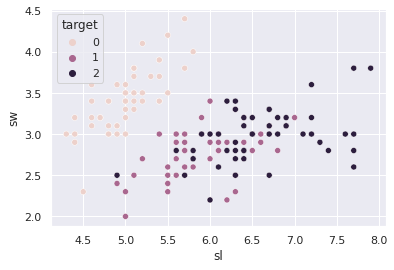

In [ ]:
p,axes = plt.subplot        
sns.scatterplot(df['sl'],df['sw'],hue=df['target'])
plt.show()

In [ ]:
cheader

array([[5.006     , 3.428     ],
       [6.81276596, 3.07446809],
       [5.77358491, 2.69245283]])

In [ ]:
df.head()

,sl,sw,pl,pw,target,label
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [ ]:
model = KMeans(n_clusters=3, random_state=1234)
model.fit(df[['pl','pw']])
pred_label = model.predict(df[['pl','pw']])
print(pred_label)
p_cheader = model.cluster_centers_
print(p_cheader,p_cheader.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]
[[1.462      0.246     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]] (3, 2)


In [ ]:
p_cheader_df = pd.DataFrame(data=p_cheader, columns=['x','y'])
p_cheader_df.head()

,x,y
0,1.462000,0.246000
1,5.595833,2.037500
2,4.269231,1.342308


In [ ]:
df['p_label'] = pred_label.reshape(-1,1)
df.head()

,sl,sw,pl,pw,target,label,p_label
0,5.1,3.5,1.4,0.2,0,0,0
1,4.9,3.0,1.4,0.2,0,0,0
2,4.7,3.2,1.3,0.2,0,0,0
3,4.6,3.1,1.5,0.2,0,0,0
4,5.0,3.6,1.4,0.2,0,0,0


In [ ]:
pd.crosstab(df['target'],df['p_label'])

p_label,0,1,2
target,,,
0,50,0,0
1,0,2,48
2,0,46,4


In [ ]:
p_cx = []
p_cy = []

for xy in cheader:
    p_cx.append(xy[0])
    p_cx.append(xy[1])

In [ ]:

# p, axes = plt.subplots(1,2, figsize=(10,3))
# sns.scatterplot(df['sl'], df['sw'], hue=df['target'], ax=axes[0])

# sns.scatterplot(df['sl'], df['sw'], hue=df['label'], ax=axes[1])
# sns.scatterplot(cheader_df['x'], cheader_df['y'], ax=axes[1])
# axes[0].grid(False)
# axes[1].grid(False)
# plt.show()

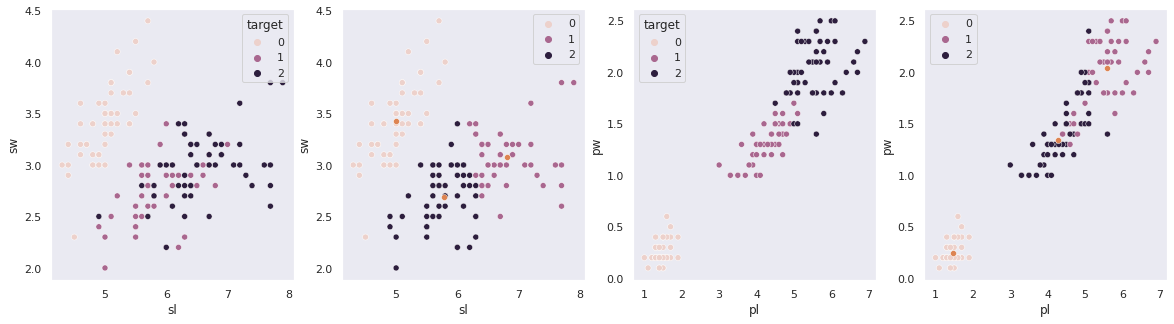

In [ ]:
p, axes = plt.subplots(1,4, figsize=(20,5))
sns.scatterplot(df['sl'],df['sw'],hue=df['target'],ax=axes[0])
sns.scatterplot(df['sl'], df['sw'], hue=df['label'],ax=axes[1])
sns.scatterplot(df['pl'],df['pw'],hue=df['target'],ax=axes[2])
sns.scatterplot(df['pl'], df['pw'], hue=df['label'],ax=axes[3])
sns.scatterplot(cheader_df['x'], cheader_df['y'], ax=axes[1])
sns.scatterplot(p_cheader_df['x'], p_cheader_df['y'], ax=axes[3])
axes[0].grid(False)
axes[1].grid(False)
axes[2].grid(False)
axes[3].grid(False)
plt.show()

In [ ]:
deforescale = df.drop(['target','label','p_label'],axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(deforescale)
scaled_df = scaler.transform(deforescale)

In [ ]:
scaled_df = pd.DataFrame(data=scaled_df,columns=['sl','sw','pl','pw'])

In [ ]:
scaled_df

,sl,sw,pl,pw
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [ ]:
model = KMeans(n_clusters=3, random_state=1234)
model.fit(scaled_df[['sl','sw']])
pred_label = model.predict(scaled_df[['sl','sw']])
print(pred_label)
cheader = model.cluster_centers_
print(cheader,cheader.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 2 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 1 2 2
 1 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[[-1.00206653  0.90625492]
 [-0.10143926 -0.94652188]
 [ 1.10971635  0.09821729]] (3, 2)


In [ ]:
scaled_df['label'] = pred_label.reshape(-1,1)
scaled_df.head()

,sl,sw,pl,pw,label
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [ ]:
pd.crosstab(df['target'],scaled_df['label'])

label,0,1,2
target,,,
0,49,1,0
1,0,35,15
2,0,16,34


In [ ]:
cheader_df = pd.DataFrame(data=cheader, columns=['x','y'])
cheader_df.head()

,x,y
0,-1.002067,0.906255
1,-0.101439,-0.946522
2,1.109716,0.098217


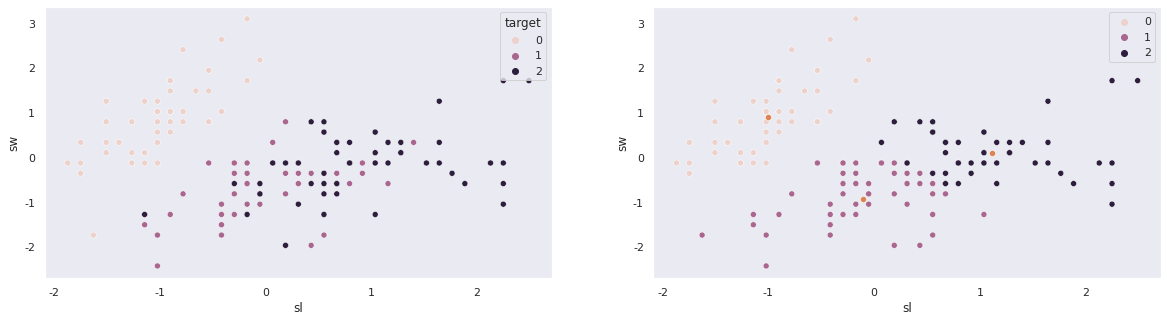

In [ ]:
p, axes = plt.subplots(1,2, figsize=(20,5))
sns.scatterplot(scaled_df['sl'],scaled_df['sw'],hue=df['target'],ax=axes[0])
sns.scatterplot(scaled_df['sl'], scaled_df['sw'], hue=scaled_df['label'],ax=axes[1])
sns.scatterplot(cheader_df['x'], cheader_df['y'], ax=axes[1])

axes[0].grid(False)
axes[1].grid(False)

plt.show()

In [ ]:
# 연습용 3차원 차트

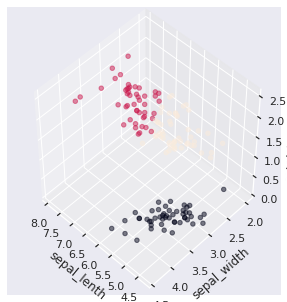

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure( figsize=(4,4))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(df['sl'],df['sw'],df['pw'],c=df['label'],alpha=0.5)
ax.set_xlabel('sepal_lenth')
ax.set_ylabel('sepal_width')
ax.set_zlabel('petal_length')
plt.show()


In [ ]:
# 적정 k값을 구해보자

[86.39021984551397, 31.37135897435897, 19.465989010989013, 13.916908757908757, 11.025145110250373]


Text(0, 0.5, 'sum of squared distances')

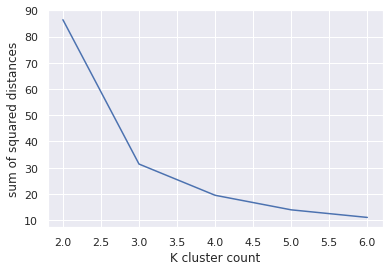

In [ ]:
n_clusters_list=[2,3,4,5,6]
inertia_list = []
for k in n_clusters_list:
        
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(df[['pl','pw']])
    inertia_list.append(model.inertia_)

print(inertia_list)
plt.plot([2,3,4,5,6],inertia_list)
plt.xlabel("K cluster count")
plt.ylabel("sum of squared distances")

[58.204092789066735, 37.05070212765956, 28.011149160808458, 21.002125982249435, 17.407916182733253]


Text(0, 0.5, 'sum of squared distances')

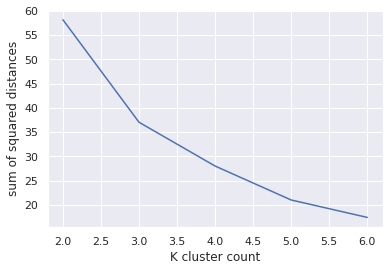

In [ ]:
n_clusters_list=[2,3,4,5,6]
inertia_list = []
for k in n_clusters_list:
        
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(df[['sl','sw']])
    inertia_list.append(model.inertia_)

print(inertia_list)
plt.plot([2,3,4,5,6],inertia_list)
plt.xlabel("K cluster count")
plt.ylabel("sum of squared distances")

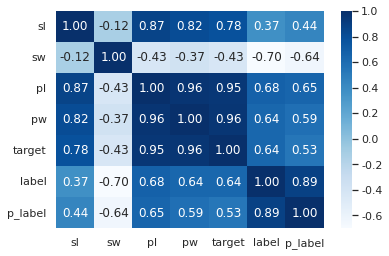

In [ ]:
sns.heatmap(df.corr(),fmt='.2f',cmap='Blues',annot=True)
plt.show()

In [ ]:
# sklearn.metrics.silhouette_samples(X, labels, *, metric='euclidean', **kwds)[source]

In [ ]:
scoef_ = silhouette_samples(df[['pl','pw']], labels=df['p_label'], metric='euclidean')
print(scoef_[:5])

[0.9439618  0.9439618  0.93011824 0.94214886 0.9439618 ]


In [ ]:
df['scoef'] = scoef_.reshape(-1,1)
df.head()

,sl,sw,pl,pw,target,label,p_label,scoef
0,5.1,3.5,1.4,0.2,0,0,0,0.943962
1,4.9,3.0,1.4,0.2,0,0,0,0.943962
2,4.7,3.2,1.3,0.2,0,0,0,0.930118
3,4.6,3.1,1.5,0.2,0,0,0,0.942149
4,5.0,3.6,1.4,0.2,0,0,0,0.943962


In [ ]:
# sklearn.metrics.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)

In [ ]:
sil_score = silhouette_score(df[['pl','pw']], labels=df['p_label'], metric='euclidean', random_state=1234)
print(sil_score)

0.6604800083974887


In [ ]:
df.groupby('label')['scoef'].mean().sort_values(ascending=False)

label
0    0.918772
1    0.567028
2    0.499681
Name: scoef, dtype: float64

In [ ]:
def view_chart(X,range_n_clusters = [2, 3, 4, 5, 6]):


    

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)


        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # -----------------------차트----------------------
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()


For n_clusters = 2 The average silhouette_score is : 0.4629549773635977
For n_clusters = 3 The average silhouette_score is : 0.4450525692083638
For n_clusters = 4 The average silhouette_score is : 0.4248889536419921
For n_clusters = 5 The average silhouette_score is : 0.41591694093833986
For n_clusters = 6 The average silhouette_score is : 0.3903663627807973


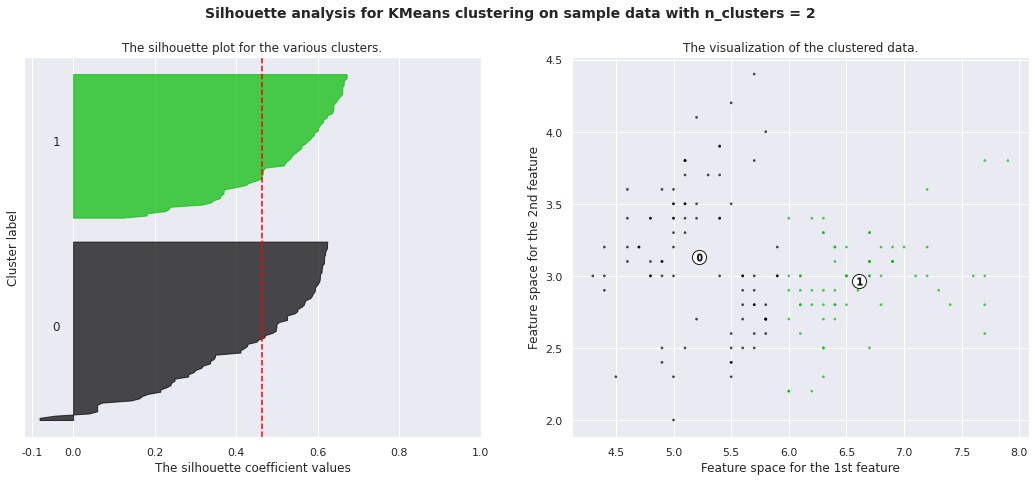

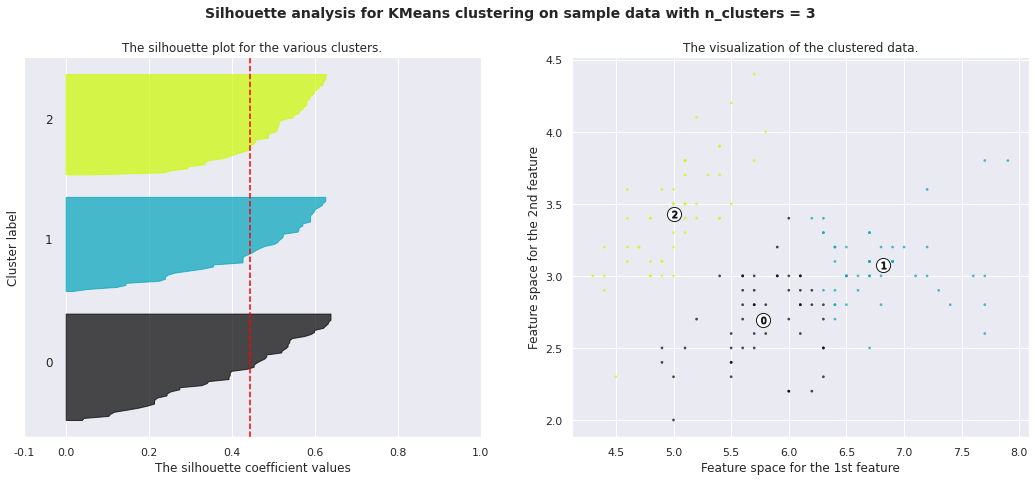

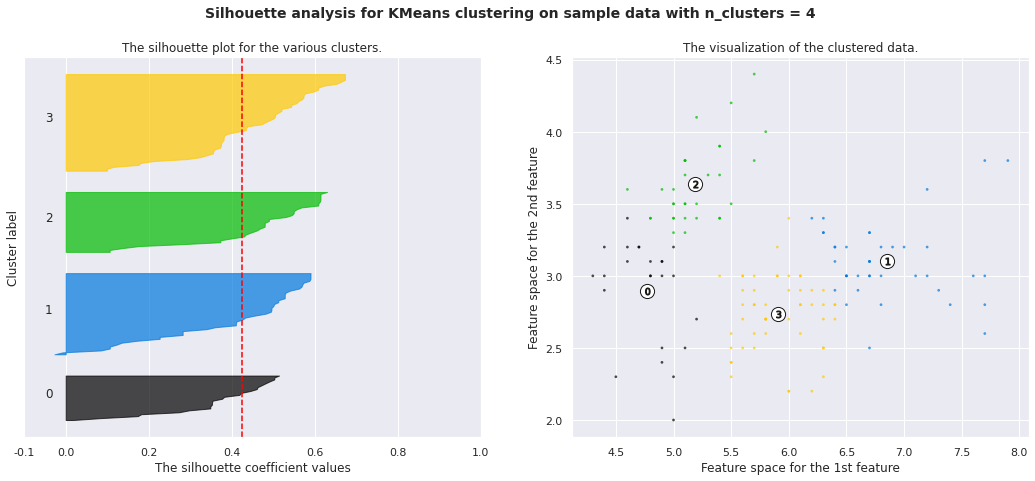

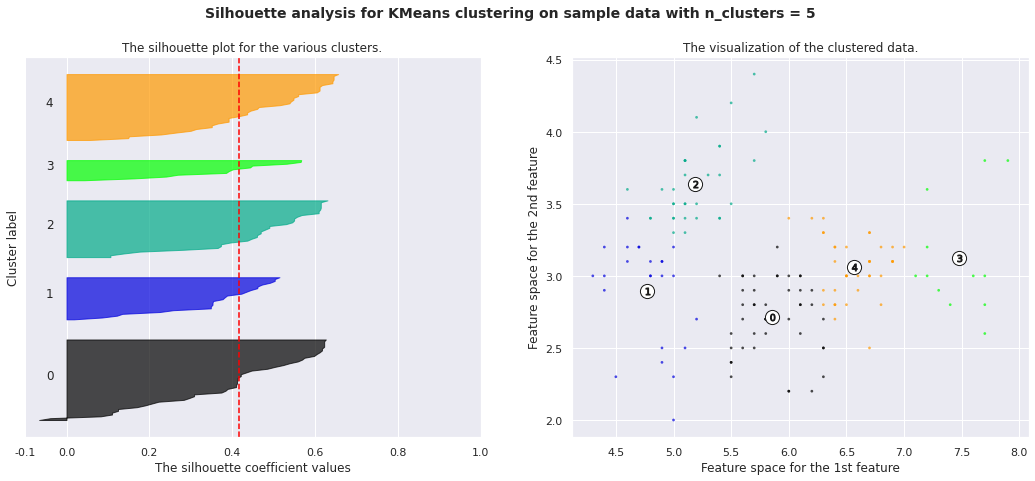

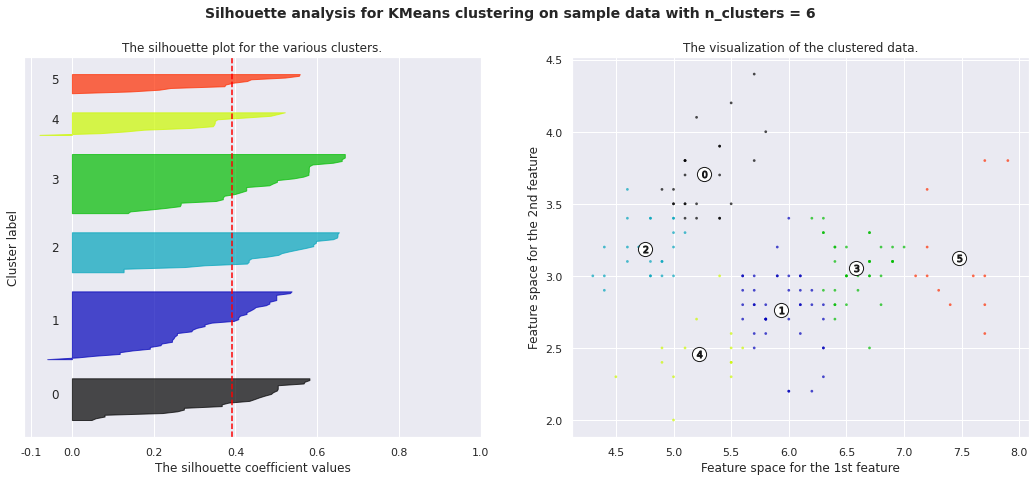

In [ ]:

view_chart(df[['sl','sw']])


# DBSCAN

In [ ]:
# class sklearn.cluster.DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)[source]

In [ ]:
model = DBSCAN(eps=0.4, min_samples=5, metric='euclidean')
pred = model.fit_predict(df[['sl', 'sw']])

df['dbscan_pred'] = pred.reshape(-1,1)   # 두개표현이 같은거임
df['dbscan_label'] = model.labels_
df.head()





,sl,sw,pl,pw,target,label,p_label,scoef,dbscan_pred,dbscan_label
0,5.1,3.5,1.4,0.2,0,0,0,0.943962,0,0
1,4.9,3.0,1.4,0.2,0,0,0,0.943962,0,0
2,4.7,3.2,1.3,0.2,0,0,0,0.930118,0,0
3,4.6,3.1,1.5,0.2,0,0,0,0.942149,0,0
4,5.0,3.6,1.4,0.2,0,0,0,0.943962,0,0


In [ ]:
# model = DBSCAN(eps=0.5,  min_samples=5, metric='euclidean').fit(df[['pl','pw']])
# model.labels_

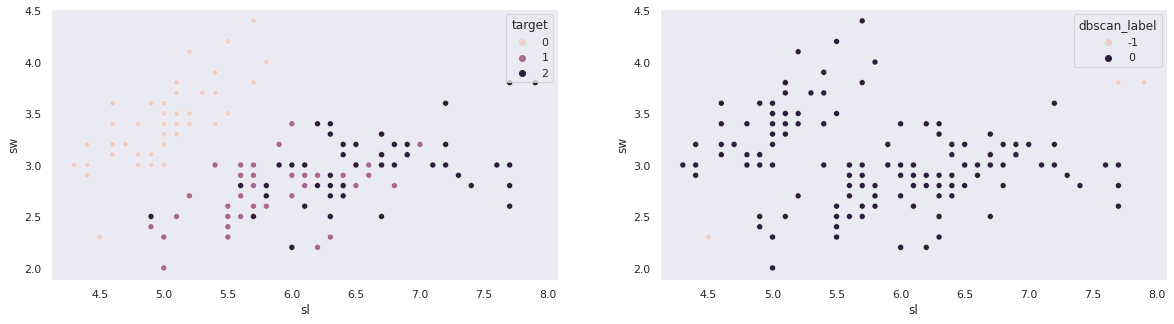

In [ ]:
p, axes = plt.subplots(1,2, figsize=(20,5))
sns.scatterplot(df['sl'],df['sw'],hue=df['target'],ax=axes[0])
sns.scatterplot(df['sl'], df['sw'], hue=df['dbscan_label'],ax=axes[1])

axes[0].grid(False)
axes[1].grid(False)

plt.show()

In [ ]:
pd.crosstab(df['target'],df['dbscan_label'])

dbscan_label,-1,0
target,,
0,0,50
1,0,50
2,2,48


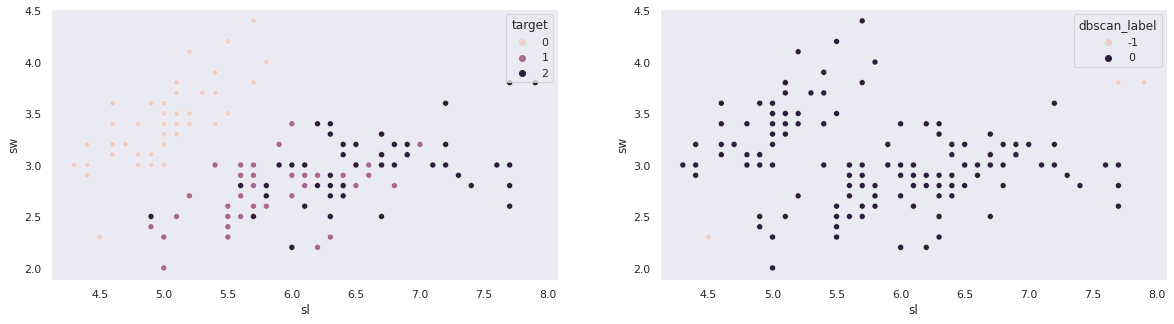

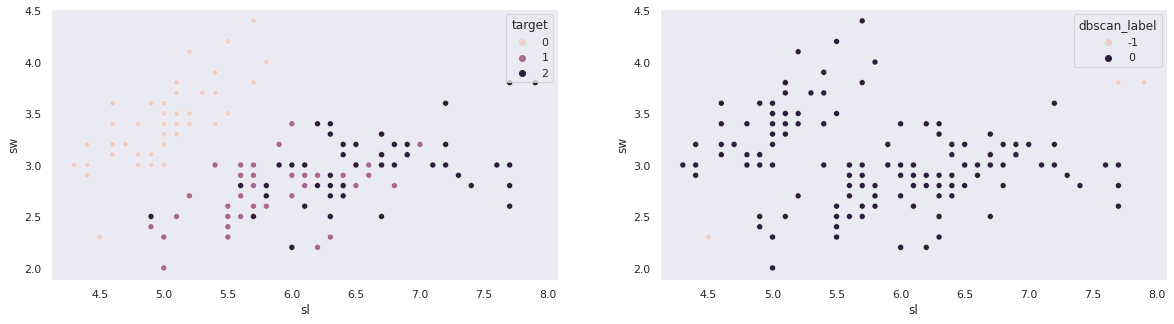

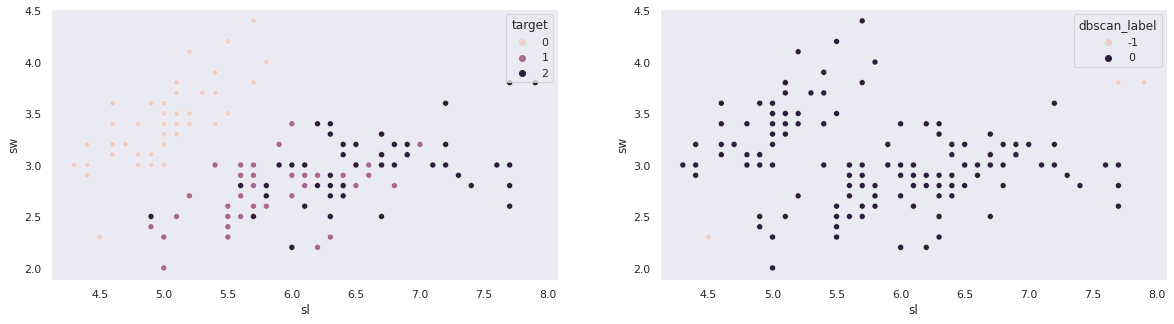

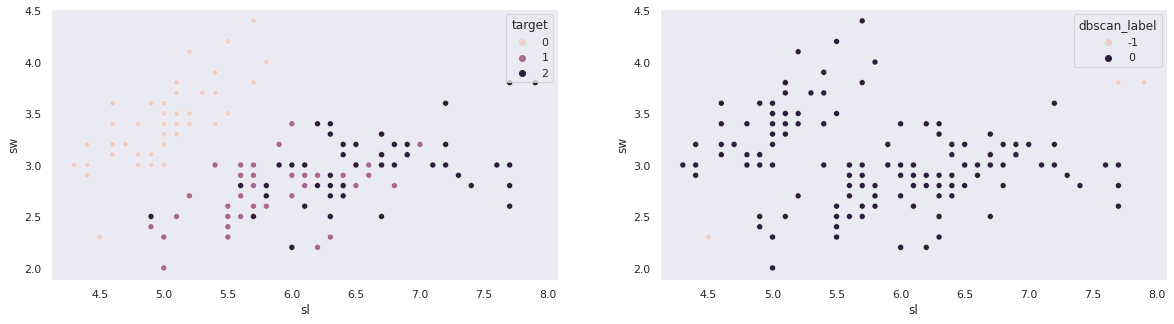

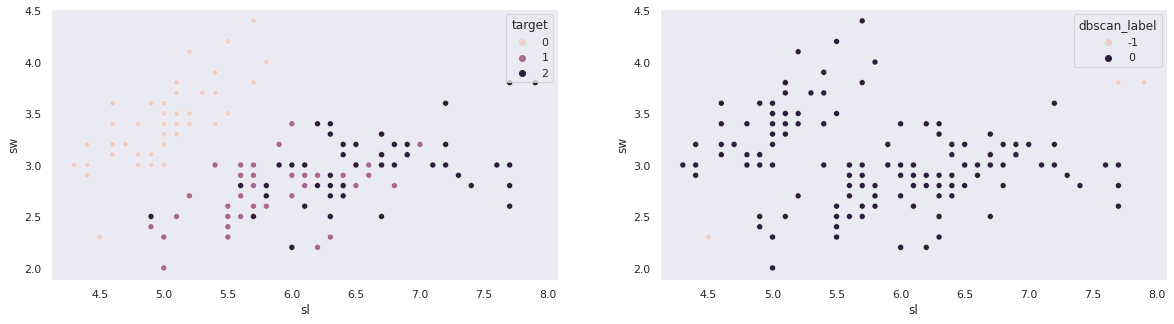

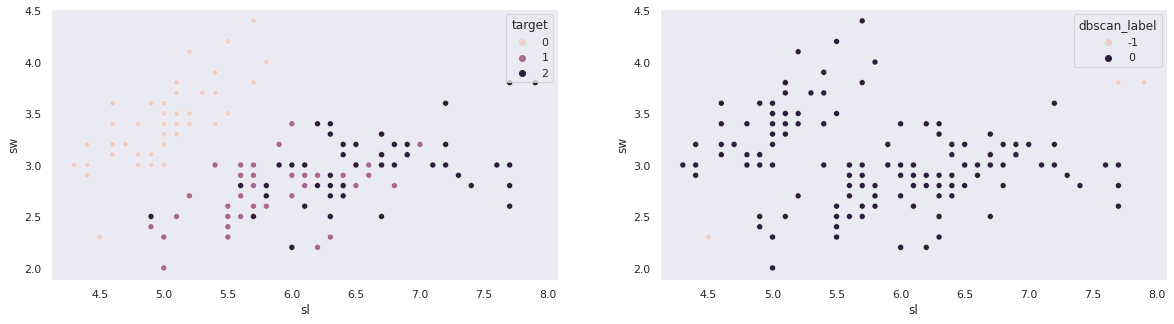

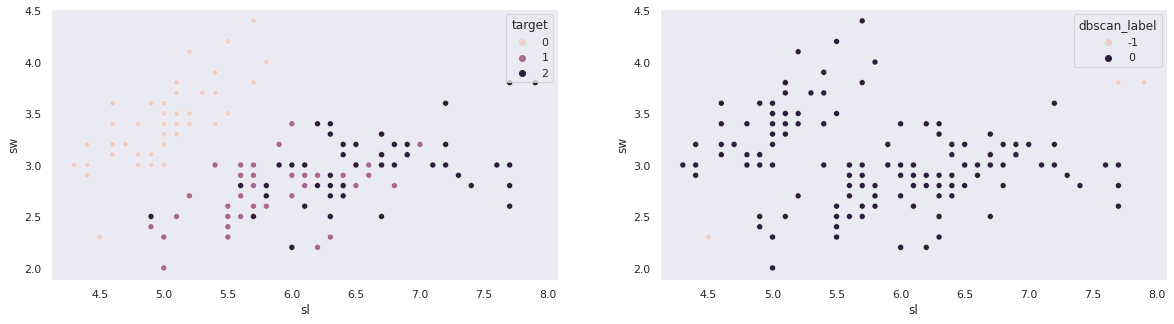

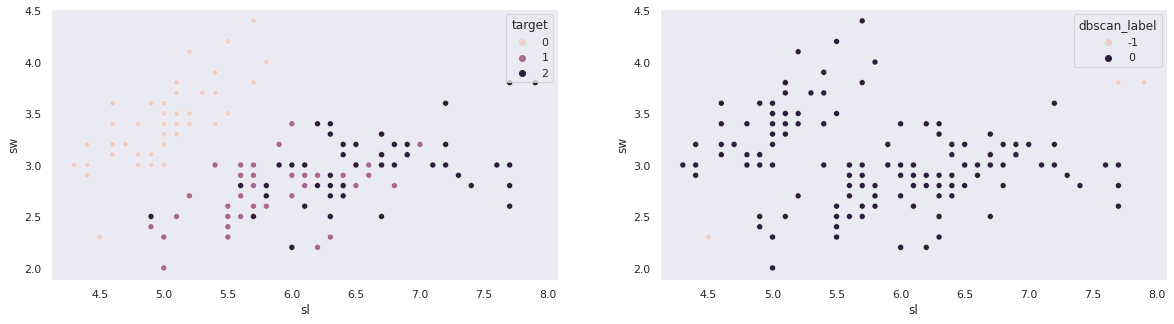

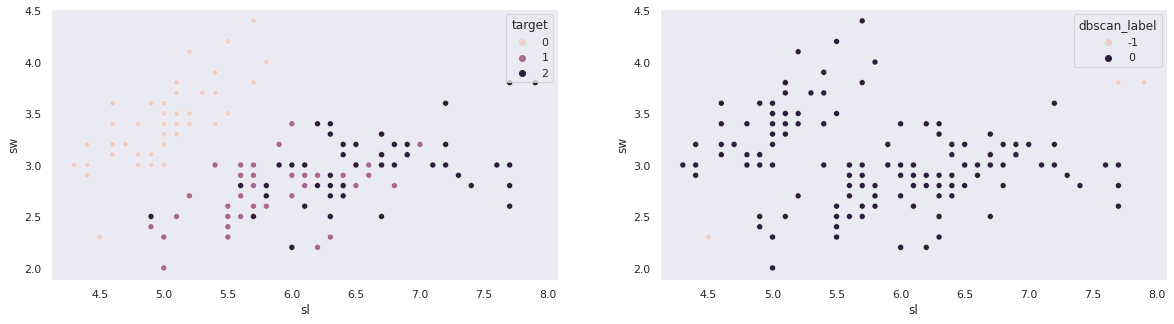

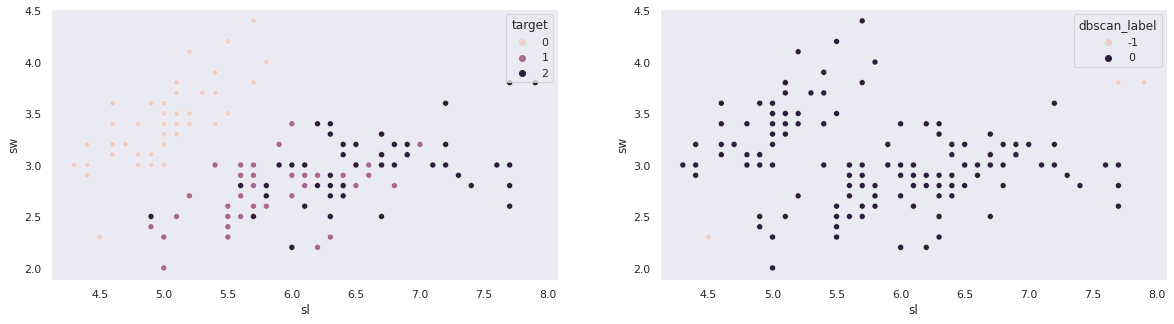

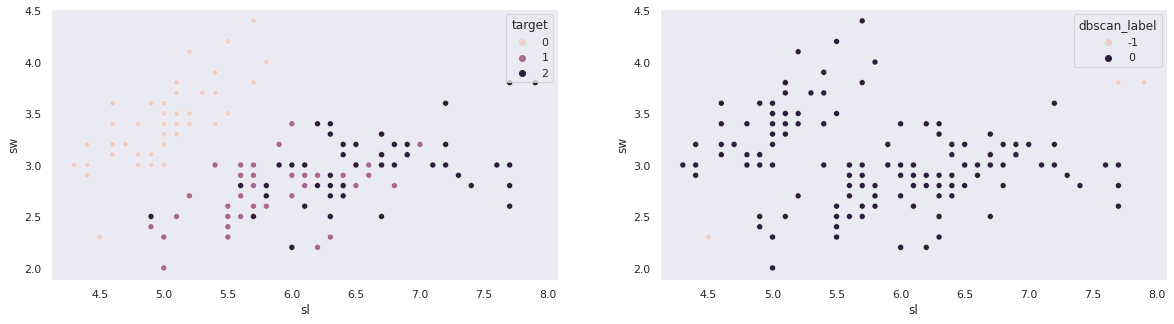

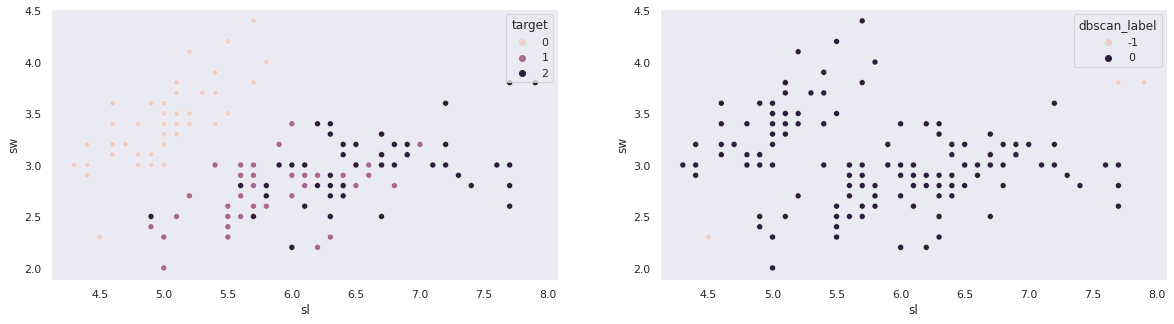

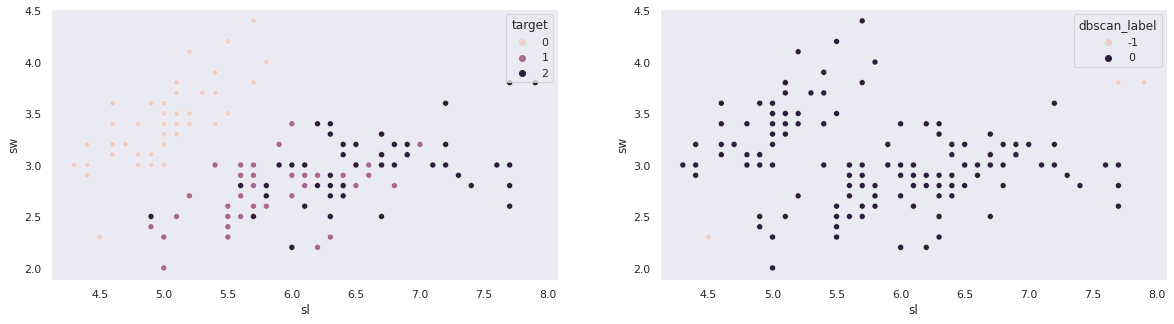

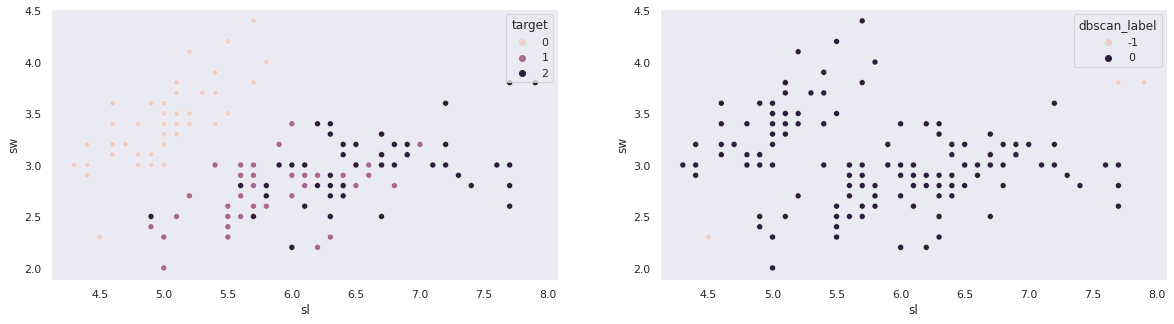

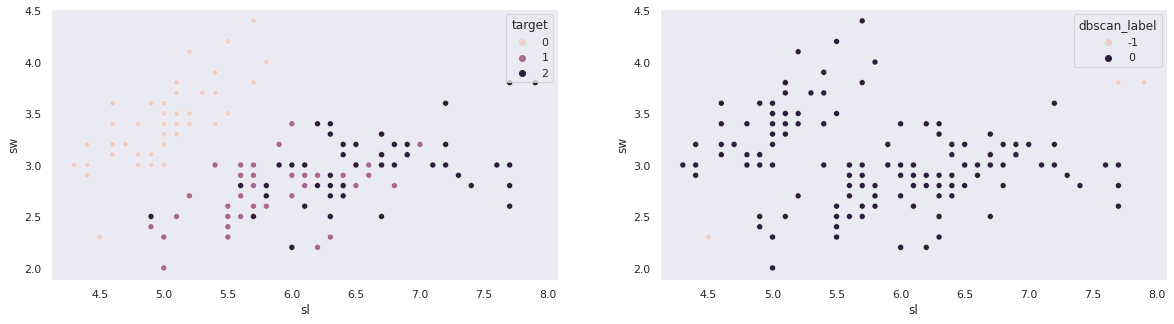

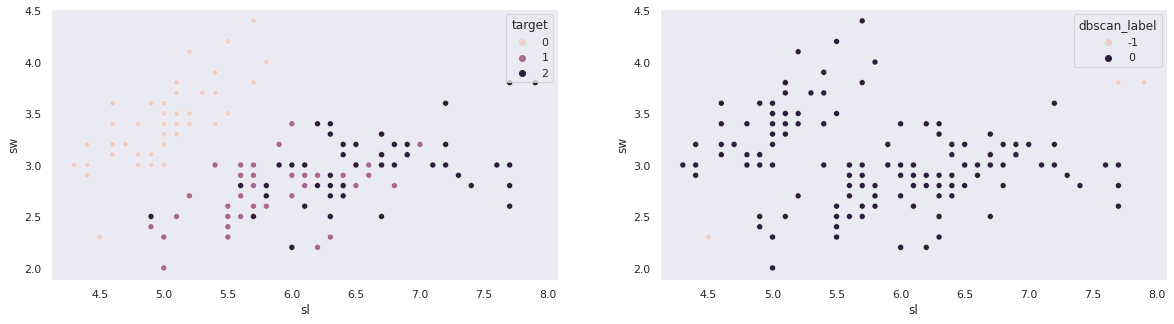

In [ ]:
eps_list = [0.2,0.3,0.4,0.5]
min_samples_list = [2,3,4,5]
for ms in min_samples_list:
    
    for eps in eps_list:
        model = DBSCAN(eps=0.4, min_samples=ms, metric='euclidean')

        
        pred = model.fit_predict(df[['sl', 'sw']])

        df['dbscan_pred'] = pred.reshape(-1,1) 
        df.head()

        p, axes = plt.subplots(1,2, figsize=(20,5))
        sns.scatterplot(df['sl'],df['sw'],hue=df['target'],ax=axes[0])
        sns.scatterplot(df['sl'], df['sw'], hue=df['dbscan_label'],ax=axes[1])

        axes[0].grid(False)
        axes[1].grid(False)

        plt.show()

#Hierarchy

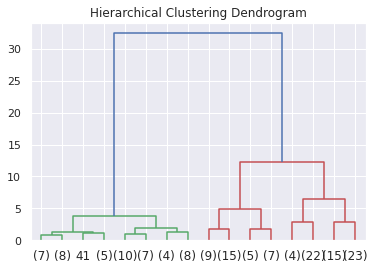

In [ ]:

from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(df[['sl','sw','pl','pw']])
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.show()

# from scipy.cluster.hierarchy import linkage

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

* method=’single’ assigns
* method=’complete’ assigns
* method=’average’ assigns


In [ ]:
arr = linkage(df[['sl','sw','pl','pw']], method='single', metric='euclidean', optimal_ordering=False)

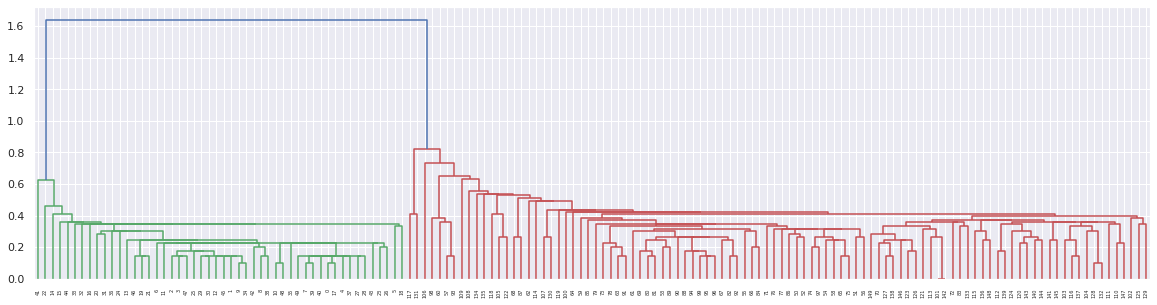

In [ ]:


plt.figure(figsize=(20,5))

plt.xticks(rotation=45)
dendrogram(arr)
plt.show()


# 주성분 분석 PCA

* 공분산 행렬 내적 - 고유값, 고유벡터
* 고유벡터 : 고유값을 가장 많이 포함할 수 있는 = 분산이 최대가 되는 벡터 선(PC1) = PC1과 직교가 되는(상관계수0) 벡터(PC2) ... ==> 원하는 설명력(explaned ratio) 를 얻을때까지 PC 분할 반복
* 주성분 : 고유값


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# class sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)

In [ ]:
print(df.iloc[:5][['sl','sw','pl','pw']])
pca = PCA(n_components=2,  random_state=1234)
pca_res = pca.fit_transform(df[['sl','sw','pl','pw']])
print(pca_res[:5])
print(pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum())

    sl   sw   pl   pw
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]
[0.92461872 0.05306648] 0.977685206318795


In [ ]:
pca_df = pd.DataFrame(data=pca_res,columns=['pc1','pc2'])
pca_df.head()

,pc1,pc2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


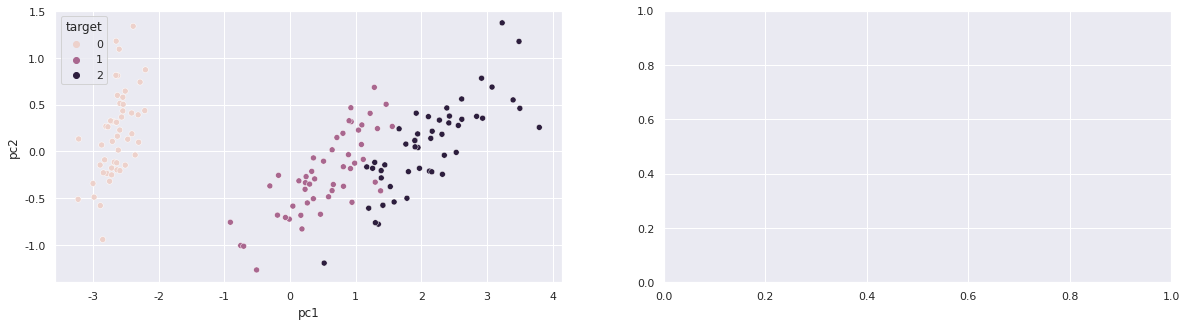

In [ ]:
p, axes = plt.subplots(1,2, figsize=(20,5))
sns.scatterplot(pca_df['pc1'],pca_df['pc2'],hue=df['target'],ax=axes[0])
plt.show()
